In [43]:
#import the libraries
import pandas as pd

import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")
import seaborn as sns

In [33]:
#read loan csv into dataframe
df = pd.read_csv("loan.csv",low_memory=False)

In [3]:
#check for size and do initial columns lookup
df.shape

(39717, 111)

In [4]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


## Clearing columns with missing values in all rows

In [5]:
df.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

In [6]:
#drop all column with all values are NaN
df = df.dropna(axis=1,how="all")

In [7]:
df.shape

(39717, 57)

In [8]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,Jun-16,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


In [9]:
#columns with only 0 values don't serve any purpose hence getting rid of them
df = df.loc[:, (df != 0).any(axis=0)]


In [10]:
df.shape

(39717, 55)

In [11]:
#tried to remove columns with float values is similar way but it didn't work
df.loc[:, (df != 0.0).any(axis=0)]

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,chargeoff_within_12_mths,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,Jan-15,171.62,NaN,May-16,0.0,1,INDIVIDUAL,0.0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,Apr-13,119.66,NaN,Sep-13,0.0,1,INDIVIDUAL,0.0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,Jun-14,649.91,NaN,May-16,0.0,1,INDIVIDUAL,0.0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,Jan-15,357.48,NaN,Apr-16,0.0,1,INDIVIDUAL,0.0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,May-16,67.79,Jun-16,May-16,0.0,1,INDIVIDUAL,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,92187,92174,2500,2500,1075.0,36 months,8.07%,78.42,A,A4,...,Jul-10,80.90,NaN,Jun-10,NaN,1,INDIVIDUAL,NaN,NaN,NaN
39713,90665,90607,8500,8500,875.0,36 months,10.28%,275.38,C,C1,...,Jul-10,281.94,NaN,Jul-10,NaN,1,INDIVIDUAL,NaN,NaN,NaN
39714,90395,90390,5000,5000,1325.0,36 months,8.07%,156.84,A,A4,...,Apr-08,0.00,NaN,Jun-07,NaN,1,INDIVIDUAL,NaN,NaN,NaN
39715,90376,89243,5000,5000,650.0,36 months,7.43%,155.38,A,A2,...,Jan-08,0.00,NaN,Jun-07,NaN,1,INDIVIDUAL,NaN,NaN,NaN


In [12]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,chargeoff_within_12_mths,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,Jan-15,171.62,NaN,May-16,0.0,1,INDIVIDUAL,0.0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,Apr-13,119.66,NaN,Sep-13,0.0,1,INDIVIDUAL,0.0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,Jun-14,649.91,NaN,May-16,0.0,1,INDIVIDUAL,0.0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,Jan-15,357.48,NaN,Apr-16,0.0,1,INDIVIDUAL,0.0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,May-16,67.79,Jun-16,May-16,0.0,1,INDIVIDUAL,0.0,0.0,0.0


In [13]:
# Hence, fill up NaN values with 0 to columns that are not needed to make it easy to drop them

df['chargeoff_within_12_mths'] = df['chargeoff_within_12_mths'].fillna(0)

In [14]:
df['collections_12_mths_ex_med'] = df['collections_12_mths_ex_med'].fillna(0)

In [15]:
df['tax_liens'] = df['tax_liens'].fillna(0)

In [16]:
df = df.loc[:, (df != 0.0).any(axis=0)]


In [20]:
df.shape

(39717, 52)

## Removing columns that do not contribute to analysis

**List of columns that we rounded up in initial review**
- url -> has same url with loan id
- pymnt_plan -> all values are n
- desc - not helpful for analysis
- initial_list_status - > all values are f
- application_type -> all values are INDIVIDUAL
- policy_code -> all value are 1

In [22]:
df = df.drop(['url','pymnt_plan','desc','initial_list_status','application_type','policy_code'],axis=1)

In [23]:
df.shape

(39717, 46)

In [24]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,pub_rec_bankruptcies
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,Jun-16,May-16,0.0


In [26]:
df['id'].nunique() == len(df['id'])

True

In [ ]:
df['member_id'].nunique() == len(df['member_id'])

True

In [27]:
df = df.drop(['id'],axis=1)

In [28]:
df.shape

(39717, 45)

In [31]:
df.head()

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,...,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,pub_rec_bankruptcies
0,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,...,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0
1,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,...,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0
2,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,...,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0
3,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,...,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0
4,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,University Medical Group,...,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,Jun-16,May-16,0.0


### Checking if any of the rows have shifted values

In [27]:
df.dtypes

member_id                    int64
loan_amnt                    int64
funded_amnt                  int64
funded_amnt_inv            float64
term                        object
int_rate                    object
installment                float64
grade                       object
sub_grade                   object
emp_title                   object
emp_length                  object
home_ownership              object
annual_inc                 float64
verification_status         object
issue_d                     object
loan_status                 object
purpose                     object
title                       object
zip_code                    object
addr_state                  object
dti                        float64
delinq_2yrs                  int64
earliest_cr_line            object
inq_last_6mths               int64
mths_since_last_delinq     float64
mths_since_last_record     float64
open_acc                     int64
pub_rec                      int64
revol_bal           

In [38]:
df.pub_rec_bankruptcies

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
39712    NaN
39713    NaN
39714    NaN
39715    NaN
39716    NaN
Name: pub_rec_bankruptcies, Length: 39717, dtype: float64

### Comparing dependency between Loan amount and Funded amount

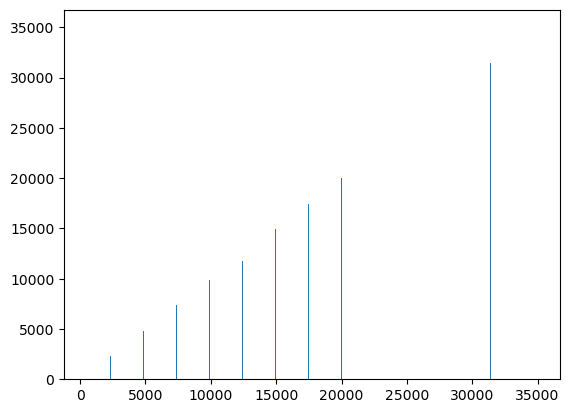

In [34]:
plt.bar(df.loan_amnt,df.funded_amnt_inv)
plt.show()

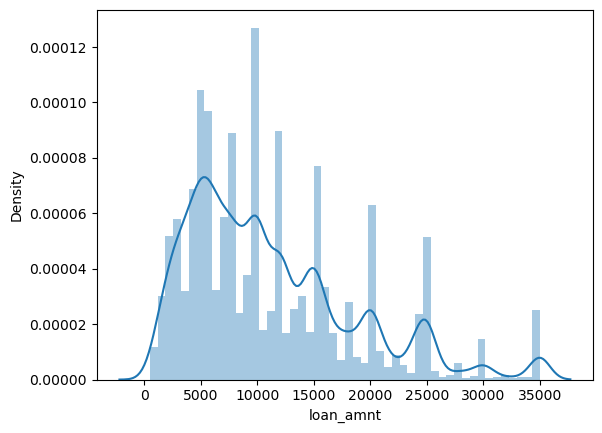

In [44]:
sns.distplot(df.loan_amnt)
plt.show()

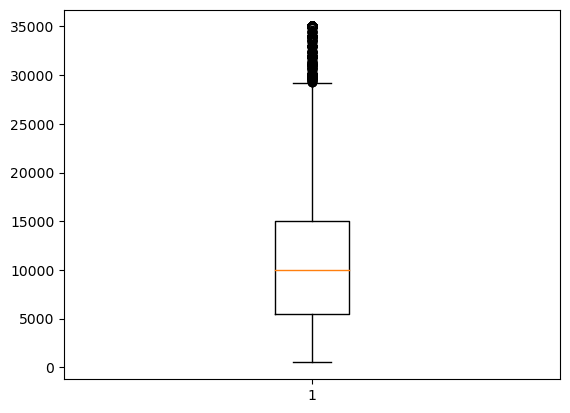

In [33]:
plt.boxplot(df.loan_amnt)
plt.show()

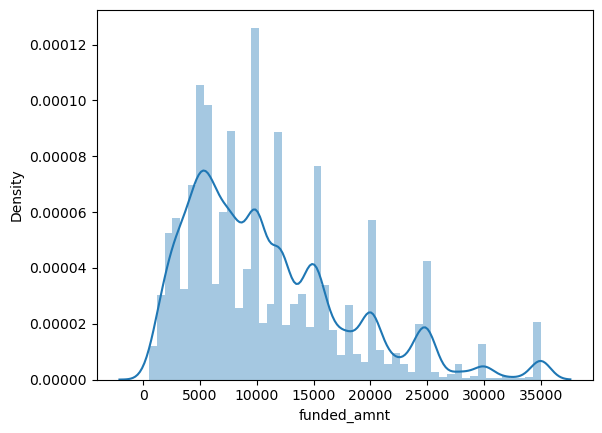

In [45]:
sns.distplot(df.funded_amnt)
plt.show()

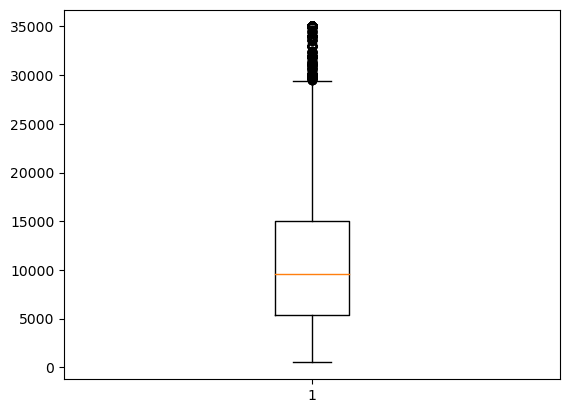

In [31]:
plt.boxplot(df.funded_amnt)
plt.show()

ValueError: too many values to unpack (expected 1)

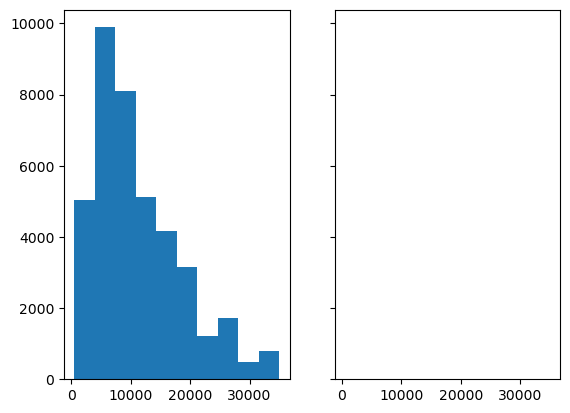

In [54]:
fig, ax = plt.subplots(ncols=2, sharex=True, sharey=True)

loanAmount, = ax[0].hist(df.loan_amnt)
loanAmount.set_label("Loan Amount")

fundedAmount = ax[1].hist(df.funded_amnt)
fundedAmount.set_label("Funded Amount")

Text(0.5, 1.0, 'Funded Amount')

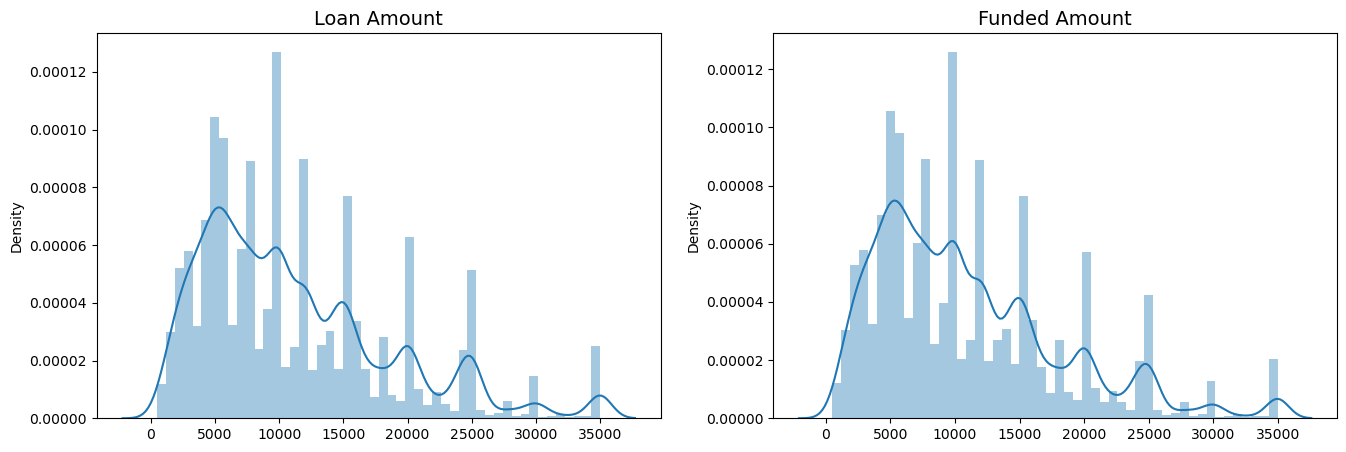

In [59]:
fig, ax = plt.subplots(1, 2, figsize=(16,5))


sns.distplot(df["loan_amnt"].values , ax = ax[0])
ax[0].set_title("Loan Amount", fontsize=14)
sns.distplot(df["funded_amnt"].values, ax=ax[1])
ax[1].set_title("Funded Amount", fontsize=14)

### Comparing dependency between Loan status and Funded amount

Text(0.5, 1.0, 'Loan Status')

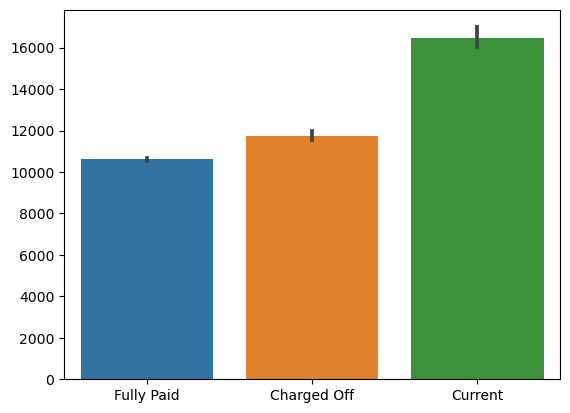

In [76]:
# fig, ax = plt.subplots(1, 2, figsize=(16,5))

loan_status = df["loan_status"].values
funded_amount = df["funded_amnt"].values


sns.barplot(x=loan_status,y=funded_amount)
ax[0].set_title("Loan Status", fontsize=14)

Text(0.5, 1.0, 'Loan Status')

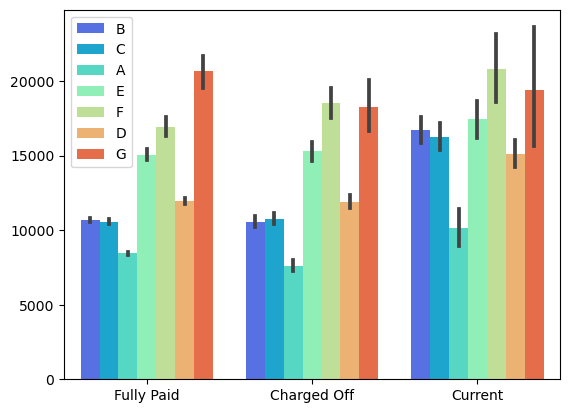

In [86]:
loan_status = df["loan_status"].values
funded_amount = df["funded_amnt"].values
grade = df["grade"].values

sns.barplot(x=loan_status,y=funded_amount,hue=grade,palette='rainbow')
ax[0].set_title("Loan Status", fontsize=14)

In [90]:
# distribution of term , removing months string from the column
df.term = df.term.str.rstrip(" months")

In [94]:
df.term = df.term.astype("int32")

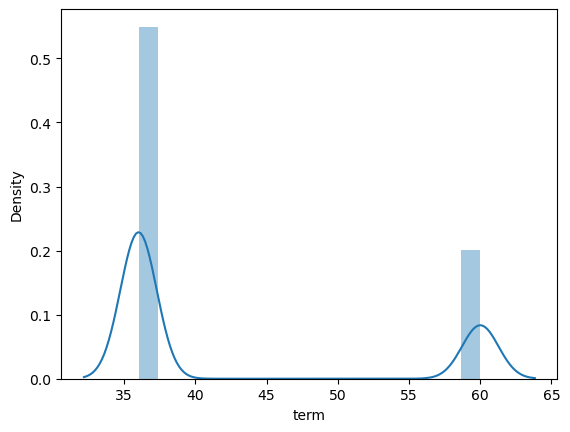

In [95]:
sns.distplot(df.term)
plt.show()

Text(0.5, 1.0, 'Loan Status')

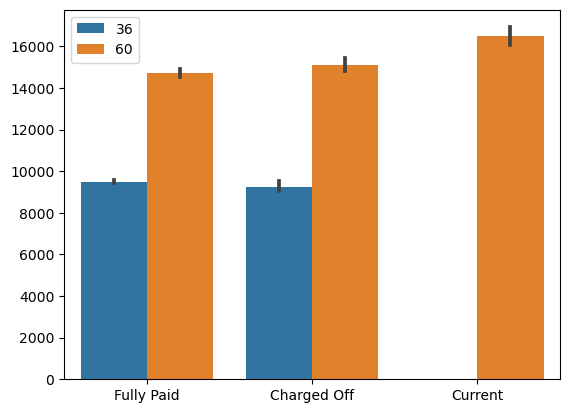

In [99]:
loan_status = df["loan_status"].values
funded_amount = df["funded_amnt"].values

term = df["term"].values
grade = df["grade"].values

sns.barplot(x=loan_status,y=funded_amount,hue=term)
ax[0].set_title("Loan Status", fontsize=14)